In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [23]:
# drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

df.set_index('DateTime', inplace=True)


def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

for i in range(1,5,1):
  junction = i
  df_junction = df[df['Junction'] == junction]['Vehicles']

Mounted at /content/drive
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 149s 13ms/step - loss: 0.0029
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 151s 13ms/step - loss: 0.0014
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - loss: 0.0012
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


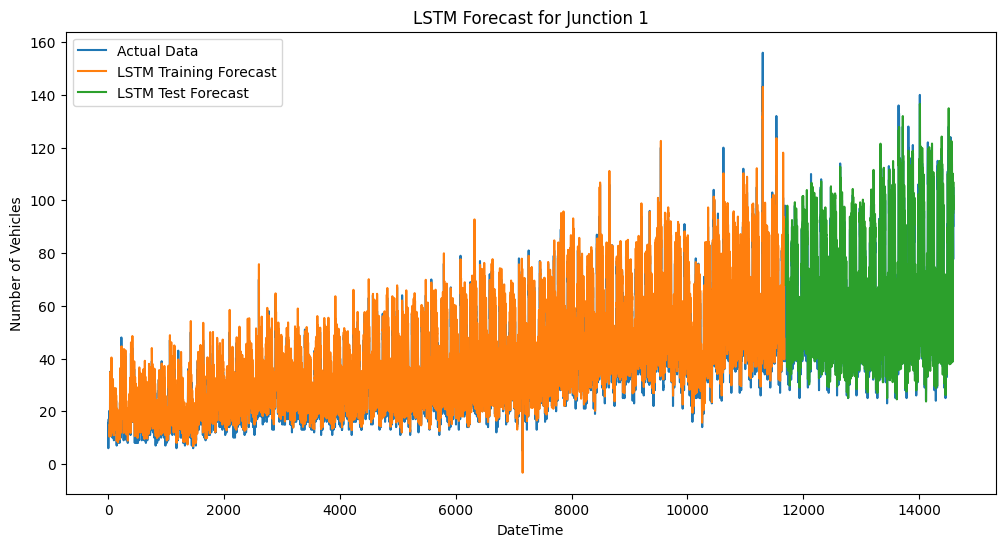

Train MSE: 36.83708515543909
Train MAE: 4.759673693514133
Train R²: 0.9000804060328773
Train MAPE: 0.136012888141328
Test MSE: 57.80228154387045
Test MAE: 6.181469196274766
Test R²: 0.8967888817515942
Test MAPE: 0.1011115379963223
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 154s 13ms/step - loss: 0.0039
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 149s 13ms/step - loss: 0.0030
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 205s 13ms/step - loss: 0.0027
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


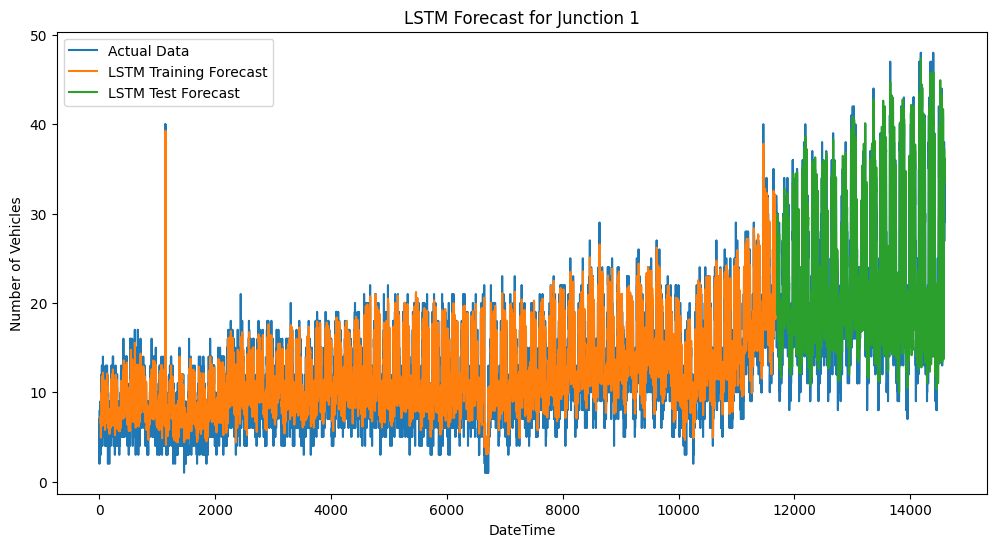

Train MSE: 6.0000836294444415
Train MAE: 1.9425561521611698
Train R²: 0.7453205900013846
Train MAPE: 0.2075730134016523
Test MSE: 11.4315856407303
Test MAE: 2.719902222125219
Test R²: 0.8328471346102166
Test MAPE: 0.13023839218832925
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 156s 13ms/step - loss: 0.0014
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 204s 13ms/step - loss: 0.0011
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 200s 13ms/step - loss: 7.9549e-04
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


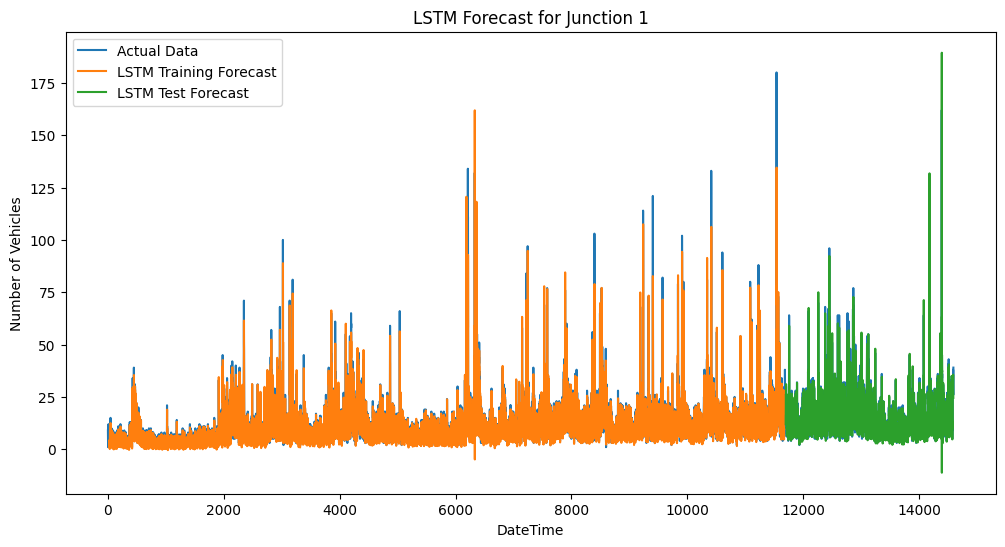

Train MSE: 30.483199950641882
Train MAE: 3.225192300066068
Train R²: 0.7079916854290973
Train MAPE: 0.3078742213120985
Test MSE: 45.34864287750623
Test MAE: 3.6759340223478465
Test R²: 0.5838789052453781
Test MAPE: 0.21610272573783457
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - loss: 0.0073
Epoch 2/3
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 0.0057
Epoch 3/3
1236/3450 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - loss: 0.0066

In [ ]:
# Prepare data for LSTM
  scaler = MinMaxScaler(feature_range=(0, 1))
  df_junction_scaled = scaler.fit_transform(df_junction.values.reshape(-1, 1))

# Split data into training and testing sets
  train_size = int(len(df_junction_scaled) * 0.8)
  train, test = df_junction_scaled[:train_size], df_junction_scaled[train_size:]



  look_back = 24
  X_train, y_train = create_dataset(train, look_back)
  X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
  model.fit(X_train, y_train, batch_size=1, epochs=3)

# Make predictions
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

# Invert predictions
  train_predict = scaler.inverse_transform(train_predict)
  y_train = scaler.inverse_transform([y_train])
  test_predict = scaler.inverse_transform(test_predict)
  y_test = scaler.inverse_transform([y_test])

# Create a new dataframe to align the predictions with the dates
  train_predict_plot = np.empty_like(df_junction_scaled)
  train_predict_plot[:, :] = np.nan
  train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

  test_predict_plot = np.empty_like(df_junction_scaled)
  test_predict_plot[:, :] = np.nan
  test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(df_junction_scaled) - 1, :] = test_predict

# Plot LSTM forecast
  plt.figure(figsize=(12, 6))
  plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
  plt.plot(train_predict_plot, label='LSTM Training Forecast')
  plt.plot(test_predict_plot, label='LSTM Test Forecast')
  plt.title('LSTM Forecast for Junction 1')
  plt.xlabel('DateTime')
  plt.ylabel('Number of Vehicles')
  plt.legend()
  plt.show()

# Performance evaluation
  train_mse = mean_squared_error(y_train[0], train_predict)
  train_mae = mean_absolute_error(y_train[0], train_predict)
  test_mse = mean_squared_error(y_test[0], test_predict)
  test_mae = mean_absolute_error(y_test[0], test_predict)

# Calculate R² score and MAPE for additional accuracy evaluation
  train_r2 = r2_score(y_train[0], train_predict)
  test_r2 = r2_score(y_test[0], test_predict)
  train_mape = mean_absolute_percentage_error(y_train[0], train_predict)
  test_mape = mean_absolute_percentage_error(y_test[0], test_predict)

  print(f'Train MSE: {train_mse}')
  print(f'Train MAE: {train_mae}')
  print(f'Train R²: {train_r2}')
  print(f'Train MAPE: {train_mape}')
  print(f'Test MSE: {test_mse}')
  print(f'Test MAE: {test_mae}')
  print(f'Test R²: {test_r2}')
  print(f'Test MAPE: {test_mape}')


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0096 - val_loss: 0.0038 - learning_rate: 5.0000e-04
Epoch 2/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0026 - val_loss: 0.0023 - learning_rate: 5.0000e-04
Epoch 3/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0018 - val_loss: 0.0019 - learning_rate: 5.0000e-04
Epoch 4/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0014 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 5/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - loss: 0.0012 - val_loss: 0.0014 - learning_rate: 5.0000e-04
Epoch 6/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 0.0012 - val_loss: 0.0013 - learning_rate: 5.0000e-04
Epoch 7/20
728/729 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0012
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
729/729 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0012 - val_loss: 0.0014 - learning_rate: 5.0000e-04
Epoch 8/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.00

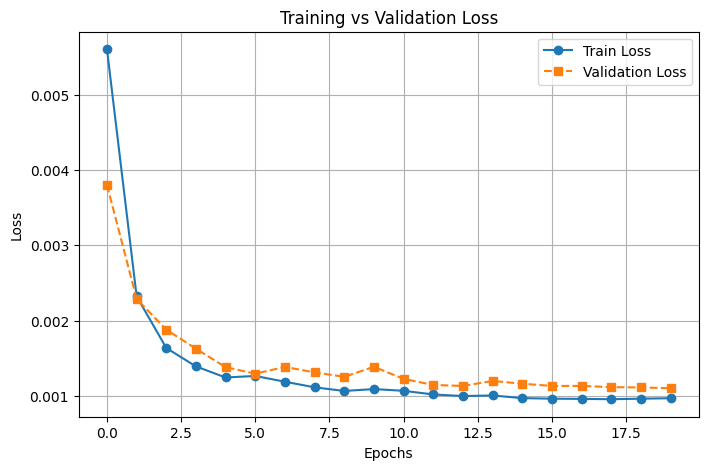

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.sort_values(by='DateTime', inplace=True)
df.set_index('DateTime', inplace=True)

junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction)

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data: training (80%), validation (10%), and testing (10%)
look_back = 24
train_size = int(len(df_junction_scaled) * 0.8)
val_size = int(len(df_junction_scaled) * 0.1)

train = df_junction_scaled[:train_size]
val = df_junction_scaled[train_size:train_size + val_size]
test = df_junction_scaled[train_size + val_size:]

X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=16, epochs=20,
    callbacks=[early_stopping, lr_scheduler], verbose=1
)


plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='s', linestyle='dashed', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [21]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Performance metrics
def evaluate(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 {dataset_name} Performance:")
    print(f"    Mean Squared Error (MSE): {mse:.4f}")
    print(f"    Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"    Mean Absolute Error (MAE): {mae:.4f}")
    print(f"    R² Score: {r2:.4f}\n")

# Evaluate performance
evaluate(y_train_actual, y_train_pred, "Train")
evaluate(y_val_actual, y_val_pred, "Validation")
evaluate(y_test_actual, y_test_pred, "Test")


365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
📊 Train Performance:
    Mean Squared Error (MSE): 18.7394
    Root Mean Squared Error (RMSE): 4.3289
    Mean Absolute Error (MAE): 3.1091
    R² Score: 0.9492

📊 Validation Performance:
    Mean Squared Error (MSE): 25.1595
    Root Mean Squared Error (RMSE): 5.0159
    Mean Absolute Error (MAE): 3.8483
    R² Score: 0.9364

📊 Test Performance:
    Mean Squared Error (MSE): 41.4753
    Root Mean Squared Error (RMSE): 6.4401
    Mean Absolute Error (MAE): 4.6248
    R² Score: 0.9401

